In [5]:
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [110]:
# DATA CHECK 
checkData <- function(data){
    ##필요한 설정들 
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr 불러오기
    par(family ="AppleGothic",bg='grey') # 그래프 배경및 한글설정
    
    cat("*****************(1.DATA HEAD)*****************\n\n");
        print(head(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(2.DATA TAIL)*****************\n\n");
        print(tail(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(3.DATA Structure)*****************\n\n");
        str(data)
    cat("******************************************************************\n\n");
    # test 의 기본 통계량 보기
    cat("*****************(4.DATA Summary)*****************\n\n");
        print(summary(test))
    cat("******************************************************************\n\n");
    cat("*****************(5.NA check)*****************\n\n");
        cat(" 5.1 Data 전체에서의 NA 개수:", sum(is.na(data)),"\n\n")
        # 컬럼 별 na 확인
        cat(" 5.2 Column 별 NA check \n")
        for(i in 1:ncol(data)){
            cat("  col[",colnames(data[i]), "] --> NA 개수:",(sum(is.na(data[,i]))),"\n")
        }
        ## 컬럼별 na 합계 계산. 
        cat("column 별 na 합계 \n",colSums(is.na(data)) ,"\n")
    cat("******************************************************************\n\n");
    cat("*****************(6.Colum 별 data 빈도수 형평성 검사)*****************\n\n");
    #A 컬럼의 최대값 최소값 빈도수
    for(i in 1:ncol(test)){
        #cat("-----",colnames(test)[i] ," 컬럼의 빈도 분석결과----- \n")
        cat("최빈값:",max(table(test[,i])), "최소빈도값 :", min(table(test[,i])), "\n")
        barplot(table(test[,i]),

            main = paste(colnames(test)[i] ," 컬럼의 데이터 별 빈도 분석 \n"),
            ylab = "빈도수",
            xlab = "데이터값",
        )
        
        cat("\n")
        # 각 컬럼의 빈도수의 최대값, 최소값 구하기 
        cat(colnames(test)[i],"컬럼의 빈도수의 최대값과 최소값\n")

    }
    
 
}
## 결측치 보상 함수 
replaceNa <-function(data){
    #data 는 vector 

    # 결측치를 무조건 제거하면 통계량을 얻을수 없으며, 데이터 손실로 문제 발생
    # 1)결측치를 제거하고 평균구하기
    meanDeleteNa <-mean(data,na.rm = T)
    cat( " >> 결측치를 제거후 평균 : ", meanDeleteNa)

    # 2) NA를 0 으로 대체하여 평균구해보기 
    meanRepZero <-mean(ifelse(is.na(data),0,data))
    cat( "\n >> 결측치를 0으로 대체후 평균 : ", meanRepZero)

    # 3) NA 를 중앙값으로 대체하여 평균구해보기
    meanRepMedian <- mean(ifelse(is.na(data),median(data,na.rm = T),data))
    cat("\n >> 결측치를 중앙값(", median(data,na.rm = T),")으로 대체후 평균: ", meanRepMedian,sep="" )

    # 4) NA 를 최소값으로 대체하여 평균 구해보기
    meanRepMin <- mean(ifelse(is.na(data), min(data,na.rm = T),data))
    cat("\n >> 결측치를 최소값(",min(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMin,sep="" )

    meanRepMax <- mean(ifelse(is.na(data), max(data,na.rm = T),data))
    cat("\n >> 결측치를 최대값(",max(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMax,sep="" )
    
    meanRep1Qt <-mean(ifelse(is.na(data), quantile(data,0.25,na.rm = T),data))
    cat("\n >> 결측치를 1사분위(",quantile(data,0.25,na.rm = T), ")으로 대체후 평균 : ",meanRep1Qt,sep="" )

    meanRep2Qt <-mean(ifelse(is.na(data), quantile(data,0.5,na.rm = T),data))
    cat("\n >> 결측치를 2사분위(",quantile(data,0.5,na.rm = T), ")으로 대체후 평균 : ",meanRep2Qt,sep="" )

    meanRep3Qt <-mean(ifelse(is.na(data), quantile(data,0.75,na.rm = T),data))
    cat("\n >> 결측치를 3사분위(",quantile(data,0.75,na.rm = T), ")으로 대체후 평균 : ",meanRep3Qt,sep="" )

    meanRep4Qt <-mean(ifelse(is.na(data), quantile(data,1,na.rm = T),data))
    cat("\n >> 결측치를 4사분위(",quantile(data,1,na.rm = T), ")으로 대체후 평균 : ",meanRep4Qt,sep="" )
    
    ## 최적 결측치 대체 값 계산
    meanReps<-c(meanRep1Qt,meanRep2Qt,meanRep3Qt,meanRep4Qt,meanRepMax,meanRepMin,meanRepMedian,meanRepZero)
    names(meanReps)<-c("1사분위","2사분위","3사분위","4사분위","최대값","최소값","중앙값","0")
    minimum_meanReps<-min(abs(meanReps-mean(data,na.rm = T)))
    meanRepOptimum <-sum(ifelse(abs(meanReps-mean(data,na.rm = T)) == minimum_meanReps,meanReps,0))
    cat ("\n")
    meanRepOptName<-names(meanReps)[which(meanReps== meanRepOptimum)]
    cat("\n >> 최적 대체 => ",meanRepOptName ,"(",meanRepOptimum ,")")


}

## Legend 세팅 함수
setLegend <- function(x,y,xpos,ypos){
    legend(
        trunc(x[,1][trunc(length(x[,1])*xpos)]), # x location of legend
        max(y)*ypos, # y location of legend
        c("Female","Male"),
        #lty= c(1,2),
        #fill =c("orange","blue"),
    )
}
#replaceNa(data)


#checkData(test)

In [7]:
read.csv("../Data/서울시민의 주관적 정신건강상태.csv", fileEncoding ="EUC-KR")

연도,지역이름,주관적.정신건강,주관적.정신건강.인식수준,응답자.수
<int>,<chr>,<int>,<chr>,<dbl>
2022,서울시,50603,좋지않은편,NA
2022,서울시,50601,좋은편,NA
2022,서울시,50602,보통,NA
2022,서울시,50604,모름/무응답,NA
2021,서울시,50602,보통,26.3
2021,서울시,50603,좋지않은편,10.6
2021,서울시,50601,좋은편,63.1
2021,서울시,50604,모름/무응답,NA
2019,서울시,50602,보통,26.7


In [9]:
read.csv("../Data/우울감+경험률(2014년+이후)_20240312134343.csv")

Warning message in file(file, "rt"):
“파일 '../Data/우울감+경험률(2014년+이후)_20240312134343.csv'를 여는데 실패했습니다: No such file or directory”


ERROR: Error in file(file, "rt"): 커넥션을 열 수 없습니다


In [12]:
read.csv("../Data/SeoulPublicShareData/서울시 정신건강복지센터 등록회원의 장기재원 경험률.csv", fileEncoding ="EUC-KR")

연도,지역이름,주민등록인구,등록회원,장기재원건수,경험율...
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2022,서초구,NA,NA,NA,NA
2022,마포구,NA,NA,NA,NA
2022,동작구,NA,NA,NA,NA
2022,서울시,NA,NA,NA,NA
2022,강남구,NA,NA,NA,NA
2022,종로구,NA,NA,NA,NA
2022,도봉구,NA,NA,NA,NA
2022,금천구,NA,NA,NA,NA
2022,강북구,NA,NA,NA,NA


In [18]:
MentalIll<-read.csv("../Data/SeoulPublicShareData/중증정신질환자 지역사회 등록관리율.csv", fileEncoding ="EUC-KR")
head(MentalIll)

,연도,지역코드,지역이름,주민등록인구,추계중증정신질환자수,정신건강복지센터.등록..중증정신질환자수,추계중증정신질환자수.대비.정신건강복지센터.등록.중증정신질환자
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,100,서울시,9428372,94284,5477,5.8
2,2022,101,종로구,141379,1414,210,14.9
3,2022,102,중구,120437,1204,131,10.9
4,2022,103,용산구,218650,2187,140,6.4
5,2022,104,성동구,281000,2810,179,6.4
6,2022,105,광진구,337416,3374,159,4.7


In [48]:
rainfall<-read.csv("../Data/SeoulPublicShareData/서울시 강수량 현황 정보.csv", fileEncoding ="EUC-KR")
weather<-read.csv("../Data/SeoulPublicShareData/서울시 권역별 실시간 대기환경 현황.csv", fileEncoding ="EUC-KR")

,조사년월일,측정소이름,측정지역,일일강수량
,<int>,<chr>,<chr>,<dbl>
1,20231231,강동,강동구,5.0
2,20231231,강북*,강북*구,5.5
3,20231231,강서,강서구,2.0
4,20231231,관악,관악구,10.5
5,20231231,광진,광진구,3.0
6,20231231,구로,구로구,3.0


,측정일시,권역명,측정소명,미세먼지.....,초미세먼지농도.....,오존.ppm.,이산화질소농도.ppm.,일산화탄소농도.ppm.,아황산가스농도.ppm.,통합대기환경등급,통합대기환경지수,지수결정물질
,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,202403121300,도심권,중구,23,22,0.032,0.022,0.4,0.002,보통,56,PM-2.5
2,202403121300,도심권,종로구,21,14,0.044,0.019,0.4,0.003,보통,62,O3
3,202403121300,도심권,용산구,22,15,0.032,0.026,0.5,0.002,보통,52,O3
4,202403121300,서북권,은평구,26,17,0.038,0.015,0.4,0.003,보통,61,PM-2.5
5,202403121300,서북권,서대문구,0,26,0.035,0.019,0.5,0.003,보통,74,PM-2.5
6,202403121300,서북권,마포구,25,21,0.035,0.025,0.4,0.002,보통,69,PM-2.5


,측정지역,일일강수량
,<chr>,<dbl>
도봉구,도봉구,14564.1
서초구,서초구,13959.0
강남구,강남구,13868.5
강북구,강북구,13702.0
노원구,노원구,13677.5
동대문구,동대문구,13568.0


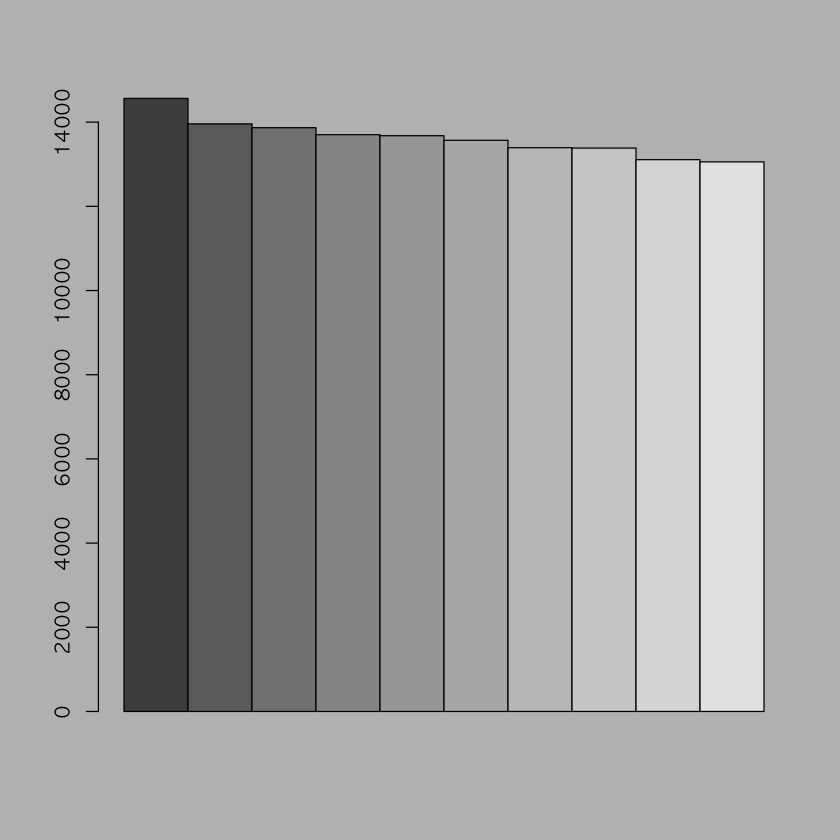

In [51]:

head(rainfall)
head(weather)
#library(dplyr)
options(warn=-1)
rainfall_top5<-head(arrange(aggregate(일일강수량~측정지역 , rainfall, sum), desc(일일강수량)),10)
rownames(rainfall_top5)<- rainfall_top5$`측정지역`
head(rainfall_top5)
par(bg = 'grey', family = 'AppleGothic')
barplot(as.matrix(rainfall_top5$`일일강수량`),beside = T )


In [52]:
# readxl 패키지 설치
install.packages("readxl")

# readxl 패키지 로드
library(readxl)


‘rematch’, ‘hms’, ‘prettyunits’, ‘cellranger’, ‘cpp11’, ‘progress’(들)을 또한 설치합니다.





다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/j9/cyqwg1g57ts8dmlvdn5rdyhw0000gn/T//RtmpgqxhU4/downloaded_packages


In [54]:
eat <- read_excel("../Data/SeoulPublicShareData/2022년 서울시 먹거리 통계 조사_마이크로데이터.xlsx")


In [75]:
trade<-read.csv("../Data/SeoulPublicShareData/서울시_상권분석서비스(추정매출-상권)_2019년.csv", fileEncoding = "EUC-KR")

In [76]:
# head(Merchandise)
for(i in colnames(trade)){

    cat (i,"\n")
}



기준_년분기_코드 
상권_구분_코드 
상권_구분_코드_명 
상권_코드 
상권_코드_명 
서비스_업종_코드 
서비스_업종_코드_명 
당월_매출_금액 
당월_매출_건수 
주중_매출_금액 
주말_매출_금액 
월요일_매출_금액 
화요일_매출_금액 
수요일_매출_금액 
목요일_매출_금액 
금요일_매출_금액 
토요일_매출_금액 
일요일_매출_금액 
시간대_00.06_매출_금액 
시간대_06.11_매출_금액 
시간대_11.14_매출_금액 
시간대_14.17_매출_금액 
시간대_17.21_매출_금액 
시간대_21.24_매출_금액 
남성_매출_금액 
여성_매출_금액 
연령대_10_매출_금액 
연령대_20_매출_금액 
연령대_30_매출_금액 
연령대_40_매출_금액 
연령대_50_매출_금액 
연령대_60_이상_매출_금액 
주중_매출_건수 
주말_매출_건수 
월요일_매출_건수 
화요일_매출_건수 
수요일_매출_건수 
목요일_매출_건수 
금요일_매출_건수 
토요일_매출_건수 
일요일_매출_건수 
시간대_건수.06_매출_건수 
시간대_건수.11_매출_건수 
시간대_건수.14_매출_건수 
시간대_건수.17_매출_건수 
시간대_건수.21_매출_건수 
시간대_건수.24_매출_건수 
남성_매출_건수 
여성_매출_건수 
연령대_10_매출_건수 
연령대_20_매출_건수 
연령대_30_매출_건수 
연령대_40_매출_건수 
연령대_50_매출_건수 
연령대_60_이상_매출_건수 


In [103]:
options(scipen = 100)
banchan2019 <- arrange(subset(trade[,c(1,3,5,7:11)],서비스_업종_코드_명	=="반찬가게"), desc(당월_매출_금액))
banchan2019

기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
20194,발달상권,가락시장,반찬가게,228487398905,4386620,186187020761,42300378144
20192,발달상권,가락시장,반찬가게,200604978040,4113614,160629617056,39975360984
20193,발달상권,가락시장,반찬가게,197092532279,4003377,165482433404,31610098875
20191,발달상권,가락시장,반찬가게,190050936547,4022755,151989869095,38061067452
20191,발달상권,포이사거리(삼호물산),반찬가게,24612000000,2599703,22314575922,2297424078
20192,발달상권,포이사거리(삼호물산),반찬가게,24612000000,2480622,22518468721,2093531279
20193,발달상권,포이사거리(삼호물산),반찬가게,24612000000,2684847,22313085126,2298914874
20194,발달상권,포이사거리(삼호물산),반찬가게,24612000000,2756864,22262437533,2349562467
20192,발달상권,강서농산물도매시장,반찬가게,21546000000,318360,16041866813,5504133187


In [111]:
banchan19<-banchan2019[-4]
head(banchan19)
checkData(banchan19)


,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액
,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,20194,발달상권,가락시장,228487398905,4386620,186187020761,42300378144
2,20192,발달상권,가락시장,200604978040,4113614,160629617056,39975360984
3,20193,발달상권,가락시장,197092532279,4003377,165482433404,31610098875
4,20191,발달상권,가락시장,190050936547,4022755,151989869095,38061067452
5,20191,발달상권,포이사거리(삼호물산),24612000000,2599703,22314575922,2297424078
6,20192,발달상권,포이사거리(삼호물산),24612000000,2480622,22518468721,2093531279


*****************(1.DATA HEAD)*****************

  기준_년분기_코드 상권_구분_코드_명 상권_코드_명 당월_매출_금액 당월_매출_건수
1            20194          발달상권     가락시장   228487398905        4386620
2            20192          발달상권     가락시장   200604978040        4113614
  주중_매출_금액 주말_매출_금액
1   186187020761    42300378144
2   160629617056    39975360984
******************************************************************

*****************(2.DATA TAIL)*****************

     기준_년분기_코드 상권_구분_코드_명       상권_코드_명 당월_매출_금액
1234            20191          전통시장 홍대소상공인상점가          14366
1235            20191          골목상권         망우역 2번           5103
     당월_매출_건수 주중_매출_금액 주말_매출_금액
1234            144          14366              0
1235            510           5103              0
******************************************************************

*****************(3.DATA Structure)*****************

'data.frame':	1235 obs. of  7 variables:
 $ 기준_년분기_코드 : int  20194 20192 20193 20191 20191 20192 20193 20194 20192 20193 ...
 $

ERROR: Error in checkData(banchan19): 객체 'test'를 찾을 수 없습니다
